# Forecasting Foreign exchange rates

Student Name : Seshadri Sundarrajan

Supervisor Name: Dr.Jim Duggan

## CRISP - DM

Thesis methodology is based on Cross-industry standard process for data mining, which is the most widely used anaysis model.

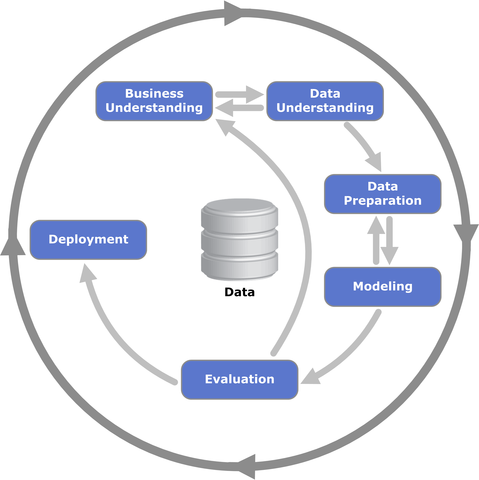

## 1. Business Understanding

## 2. Data Understanding

### 2.1 Data Collection


Data collection Period

    -2000-01-01 to 2020-05-15

In [1]:
import pandas as pd
import numpy as np

###### 2.1.1 Exchange rate data

Source : https://fred.stlouisfed.org/ ( Federal Reserve Bank of St. Louis )

In [2]:
# Rading the data
us_euro_uk_inr = pd.read_csv('DEXUSEU_UK_INR.csv')
us_euro_uk_inr.index = pd.DatetimeIndex(pd.to_datetime(us_euro_uk_inr.DATE,format='%d-%m-%Y'))
us_euro_uk_inr = us_euro_uk_inr.asfreq('b')
us_euro_uk_inr.head(6)



,DATE,DEXUSEU,DEXUSUK,DEXINUS
DATE,,,,
2000-01-03,03-01-2000,1.0155,1.6270,43.55
2000-01-04,04-01-2000,1.0309,1.6370,43.55
2000-01-05,05-01-2000,1.0335,1.6415,43.55
2000-01-06,06-01-2000,1.0324,1.6475,43.55
2000-01-07,07-01-2000,1.0294,1.6384,43.55
2000-01-10,10-01-2000,1.0252,1.6374,43.55


###### 2.1.2 Commodity prices data

Source : https://in.investing.com/ ( Online data and news website that provides financial information )

    -Gold - Valued in USD and corresponds to one Ounce (31.1g)
    -Crude Oil WTI - Valued in USD and corresponds to One Barrel (42 gallons)

###### 2.1.2 STOCK indexes

Source : https://in.investing.com/ ( Online data and news website that provides financial information )

    - EURO STOXX 50
    - S&P 500 (US)
    - FTSE100 (UK)
    - NIFTY 50 (INR)

In [3]:
# Reading the data and setting date index
stock_df = pd.read_csv('Stock_Indexes_Thesis.csv')
stock_df.index = pd.DatetimeIndex(pd.to_datetime(stock_df.Date,format='%d-%m-%Y'))
del stock_df['Date']
stock_df

,EU_STOXX50,UK_FTSE100,US_SP500,INR_NIFTY50
Date,,,,
2020-05-15,2770.70,5799.77,286.28,9136.85
2020-05-14,2760.23,5741.54,284.97,9142.75
2020-05-13,2810.55,5904.05,281.60,9383.55
2020-05-12,2884.20,5994.77,286.67,9196.55
2020-05-11,2883.75,5939.73,292.50,9239.20
...,...,...,...,...
2000-01-07,4648.27,6504.75,145.75,1613.30
2000-01-06,4500.69,6447.24,137.75,1617.60
2000-01-05,4541.75,6535.90,140.00,1595.80


## 3. Data Preparation

###### 3.1.1 Exchange rate data

In [4]:
# Finding the total Null values
us_euro_uk_inr.isna().sum()

DATE         0
DEXUSEU    201
DEXUSUK    201
DEXINUS    202
dtype: int64

In [5]:
stock_df.isna().sum()

EU_STOXX50       6
UK_FTSE100      78
US_SP500       189
INR_NIFTY50    272
dtype: int64

Impuation using Forward Fill, when the market is closed the rate stays the same from that of previous day

In [6]:
# Imputing values usig forward fill
us_euro_uk_inr = us_euro_uk_inr.fillna(method='ffill')
us_euro_uk_inr.isna().sum()

DATE       0
DEXUSEU    0
DEXUSUK    0
DEXINUS    0
dtype: int64

In [7]:
# Imputing values usig forward fill
stock_df = stock_df.fillna(method='ffill')
stock_df.isna().sum()

EU_STOXX50     0
UK_FTSE100     0
US_SP500       0
INR_NIFTY50    0
dtype: int64

Obtaining crosscurrency rates. Ex: using EUR/USD & USD/EUR to get EUR/INR

In [8]:
us_euro_uk_inr['USD_EU'] = us_euro_uk_inr['DEXUSEU']

# EU/GBP = (USD/GBP) / (USD/EU)
us_euro_uk_inr['EU_GBP'] =  us_euro_uk_inr['DEXUSUK'] /  us_euro_uk_inr['DEXUSEU']


# INR/EU = (USD/EU) * (INR/USD)
us_euro_uk_inr['INR_EU'] =  us_euro_uk_inr['DEXUSEU'] *  us_euro_uk_inr['DEXINUS']


us_euro_uk_inr = us_euro_uk_inr.round(4)
us_euro_uk_inr.iloc[5310:5315,]

,DATE,DEXUSEU,DEXUSUK,DEXINUS,USD_EU,EU_GBP,INR_EU
DATE,,,,,,,
2020-05-11,11-05-2020,1.0818,1.2330,75.87,1.0818,1.1398,82.0762
2020-05-12,12-05-2020,1.0864,1.2299,75.03,1.0864,1.1321,81.5126
2020-05-13,13-05-2020,1.0837,1.2225,75.33,1.0837,1.1281,81.6351
2020-05-14,14-05-2020,1.0800,1.2194,75.48,1.0800,1.1291,81.5184
2020-05-15,15-05-2020,1.0816,1.2129,75.82,1.0816,1.1214,82.0069


Merging Forex and Stock indexes

In [9]:
us_euro_uk_inr = us_euro_uk_inr.merge(stock_df, how='outer', left_index=True, right_index=True)
us_euro_uk_inr = us_euro_uk_inr.iloc[:,4:]
us_euro_uk_inr

,USD_EU,EU_GBP,INR_EU,EU_STOXX50,UK_FTSE100,US_SP500,INR_NIFTY50
2000-01-03,1.0155,1.6022,44.2250,4849.22,6665.86,145.44,1592.20
2000-01-04,1.0309,1.5879,44.8957,4657.83,6665.86,139.75,1638.70
2000-01-05,1.0335,1.5883,45.0089,4541.75,6535.90,140.00,1595.80
2000-01-06,1.0324,1.5958,44.9610,4500.69,6447.24,137.75,1617.60
2000-01-07,1.0294,1.5916,44.8304,4648.27,6504.75,145.75,1613.30
...,...,...,...,...,...,...,...
2020-05-11,1.0818,1.1398,82.0762,2883.75,5939.73,292.50,9239.20
2020-05-12,1.0864,1.1321,81.5126,2884.20,5994.77,286.67,9196.55
2020-05-13,1.0837,1.1281,81.6351,2810.55,5904.05,281.60,9383.55
2020-05-14,1.0800,1.1291,81.5184,2760.23,5741.54,284.97,9142.75


###### 3.1.2 Commodity prices

Prices were not recored for some business days , so imputing them using forward fill

In [10]:
# Creating the commodity dataframe with business days betweet the dtaa period

Bdays = pd.date_range(start='1/1/2000', end='15/05/2020',freq='B')
comm_df = pd.DataFrame(index = Bdays,columns = ['Date','Gold','Crude_oil'])
comm_df.Date = [str(bday.date()) for bday in Bdays]
comm_df[5300:5315]

,Date,Gold,Crude_oil
2020-04-27,2020-04-27,NaN,NaN
2020-04-28,2020-04-28,NaN,NaN
2020-04-29,2020-04-29,NaN,NaN
2020-04-30,2020-04-30,NaN,NaN
2020-05-01,2020-05-01,NaN,NaN
2020-05-04,2020-05-04,NaN,NaN
2020-05-05,2020-05-05,NaN,NaN
2020-05-06,2020-05-06,NaN,NaN
2020-05-07,2020-05-07,NaN,NaN
2020-05-08,2020-05-08,NaN,NaN


Inserting commodity prices separtely as gold and crude oil has missing values at different dates

In [11]:
gold_df = pd.read_csv('Gold.csv',index_col=0)
gold_df.index = pd.DatetimeIndex(gold_df.index)

crude_oil_df = pd.read_csv('Crude_oil_wti.csv',index_col=0)
crude_oil_df.index = pd.DatetimeIndex(crude_oil_df.index)


In [12]:
comm_df.Gold = comm_df.Date.apply(lambda x : gold_df[x].Close.item() if x in gold_df.index else np.nan)
comm_df.Crude_oil = comm_df.Date.apply(lambda x : crude_oil_df[x].Close.item() if x in crude_oil_df.index else np.nan)
comm_df

,Date,Gold,Crude_oil
2000-01-03,2000-01-03,NaN,NaN
2000-01-04,2000-01-04,282.7,25.55
2000-01-05,2000-01-05,281.1,24.91
2000-01-06,2000-01-06,281.4,24.78
2000-01-07,2000-01-07,281.9,24.22
...,...,...,...
2020-05-11,2020-05-11,1698.0,24.14
2020-05-12,2020-05-12,1706.8,25.78
2020-05-13,2020-05-13,1716.4,25.29
2020-05-14,2020-05-14,1740.9,27.56


Imputation using forward fill and first record is missing so used backward fill only for that

In [13]:
comm_df = comm_df.fillna(method='ffill').fillna(method='bfill')

#### 3.1.3 Merging both datasets

In [14]:
us_euro_uk_inr['Gold_USD'] = comm_df.Gold
us_euro_uk_inr['Crude_oil_USD'] = comm_df.Crude_oil
us_euro_uk_inr

,USD_EU,EU_GBP,INR_EU,EU_STOXX50,UK_FTSE100,US_SP500,INR_NIFTY50,Gold_USD,Crude_oil_USD
2000-01-03,1.0155,1.6022,44.2250,4849.22,6665.86,145.44,1592.20,282.7,25.55
2000-01-04,1.0309,1.5879,44.8957,4657.83,6665.86,139.75,1638.70,282.7,25.55
2000-01-05,1.0335,1.5883,45.0089,4541.75,6535.90,140.00,1595.80,281.1,24.91
2000-01-06,1.0324,1.5958,44.9610,4500.69,6447.24,137.75,1617.60,281.4,24.78
2000-01-07,1.0294,1.5916,44.8304,4648.27,6504.75,145.75,1613.30,281.9,24.22
...,...,...,...,...,...,...,...,...,...
2020-05-11,1.0818,1.1398,82.0762,2883.75,5939.73,292.50,9239.20,1698.0,24.14
2020-05-12,1.0864,1.1321,81.5126,2884.20,5994.77,286.67,9196.55,1706.8,25.78
2020-05-13,1.0837,1.1281,81.6351,2810.55,5904.05,281.60,9383.55,1716.4,25.29
2020-05-14,1.0800,1.1291,81.5184,2760.23,5741.54,284.97,9142.75,1740.9,27.56


In [15]:
us_euro_uk_inr.to_csv('Forex_data_preprocessed.csv')
us_euro_uk_inr.describe()

,USD_EU,EU_GBP,INR_EU,EU_STOXX50,UK_FTSE100,US_SP500,INR_NIFTY50,Gold_USD,Crude_oil_USD
count,5315.000000,5315.000000,5315.000000,5315.000000,5315.000000,5315.000000,5315.000000,5315.000000,5315.000000
mean,1.207321,1.322735,63.761986,3253.031957,5893.965637,160.148706,5237.469746,964.434709,61.369460
std,0.165798,0.176527,12.499856,701.987417,1016.367979,60.952323,3272.821566,481.369849,26.299954
min,0.827000,1.022000,38.620900,1809.980000,3287.040000,68.110000,854.200000,255.100000,-37.630000
25%,1.107400,1.161650,54.941100,2755.915000,5213.220000,115.925000,1994.000000,426.250000,39.785000
50%,1.221300,1.264300,64.534400,3154.910000,5955.990000,137.000000,5109.600000,1121.300000,58.240000
75%,1.329650,1.470100,74.260650,3606.545000,6649.430000,202.425000,7914.700000,1349.000000,81.860000
max,1.601000,1.755100,91.682900,5464.430000,7877.450000,338.340000,12362.300000,1888.700000,145.290000


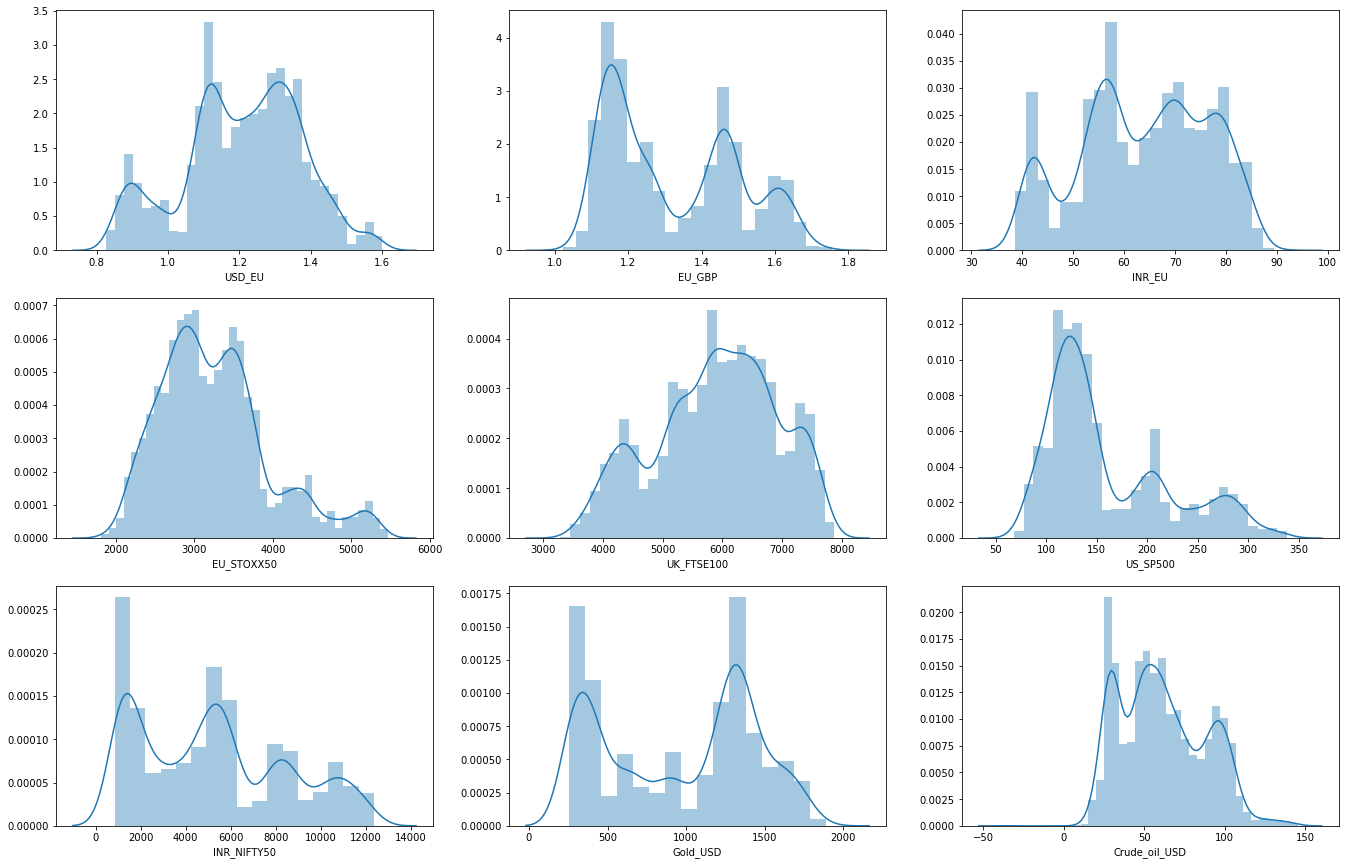

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3,3,figsize=(23,15))

i = 0
for idx,col in enumerate(us_euro_uk_inr.columns):
    sub_dim_x,sub_dim_y = divmod(idx, 3)
    sns.distplot(us_euro_uk_inr[col],ax=axs[sub_dim_x,sub_dim_y])


## 4. Modeling

### 4.1 Exploratory Data Analysis

#### 4.1.1 Correlation 

In [17]:
cor_matx = us_euro_uk_inr[list(us_euro_uk_inr.columns)].corr()
c = cor_matx.values

# Choosing lower triangular matrix and setting diagonal and upper triangular values as Null
cor_matx = pd.DataFrame(np.tril(c),index=cor_matx.index , columns=cor_matx.columns)
cor_matx = cor_matx[(cor_matx != 0) ]
cor_matx = cor_matx[cor_matx !=1]
cor_matx

,USD_EU,EU_GBP,INR_EU,EU_STOXX50,UK_FTSE100,US_SP500,INR_NIFTY50,Gold_USD,Crude_oil_USD
USD_EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EU_GBP,-0.538554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INR_EU,0.406560,-0.844314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EU_STOXX50,-0.364942,0.495958,-0.353724,NaN,NaN,NaN,NaN,NaN,NaN
UK_FTSE100,-0.057168,-0.366433,0.553082,0.488545,NaN,NaN,NaN,NaN,NaN
US_SP500,-0.160179,-0.472816,0.701648,0.221923,0.851772,NaN,NaN,NaN,NaN
INR_NIFTY50,0.146725,-0.744087,0.861404,-0.037370,0.788101,0.906135,NaN,NaN,NaN
Gold_USD,0.403207,-0.863428,0.845865,-0.370066,0.541704,0.574430,0.810554,NaN,NaN
Crude_oil_USD,0.813343,-0.549638,0.479761,-0.222277,0.250568,0.031627,0.298459,0.588886,NaN


###### Correlation HeatMap

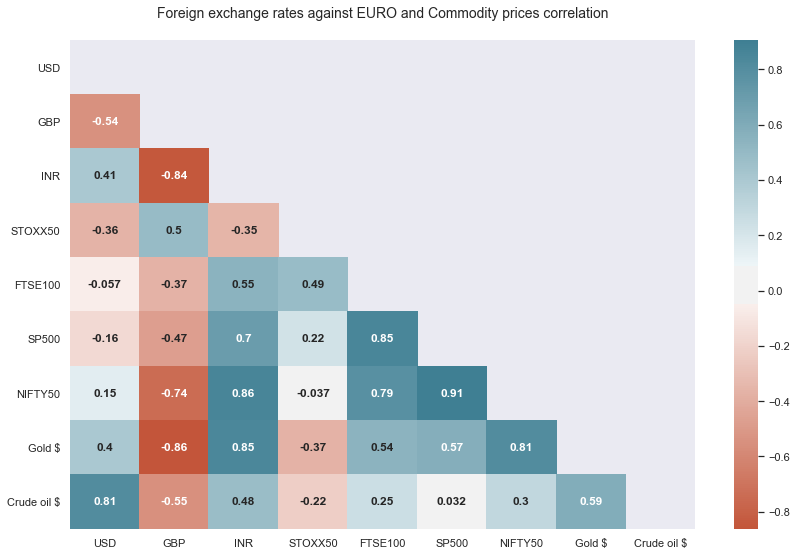

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(14,9))
columns = ['USD','GBP','INR','STOXX50','FTSE100','SP500','NIFTY50','Gold $', 'Crude oil $']

# Setting a diverging scale from red to green
cmap = sns.diverging_palette(20, 220, sep=20, as_cmap=True)

hmap = sns.heatmap(cor_matx, annot=True,cmap=cmap,annot_kws={"fontsize":12,"weight":'bold'})
hmap.set_xticklabels(labels = columns, rotation=0)
hmap.set_yticklabels(labels = columns, rotation=0)
plt.title('Foreign exchange rates against EURO and Commodity prices correlation\n',fontsize=14)


plt.show()

###### Correlation Inference    (Assuming absolute correlation coefficient threshold as 0.60)
    
    -EU/USD is highly correlated with Crude Oil
   
    -EU/GBP , EU/INR and Gold are  highly correlated. 


#### 4.1.2 Time series Decomposition

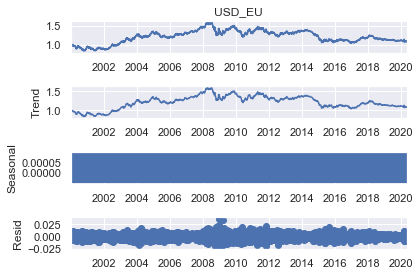

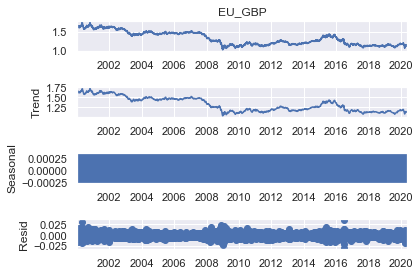

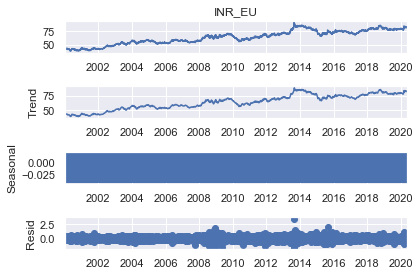

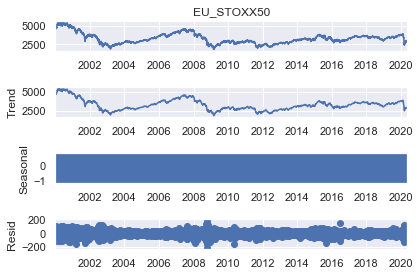

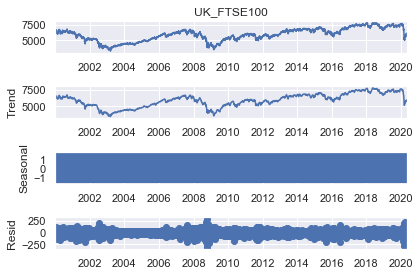

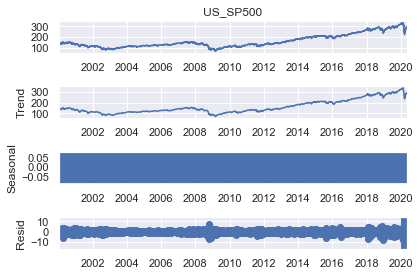

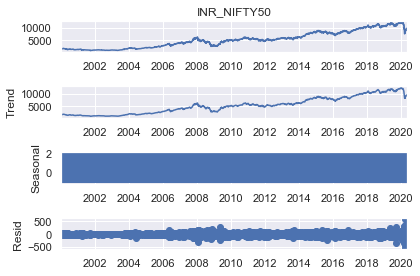

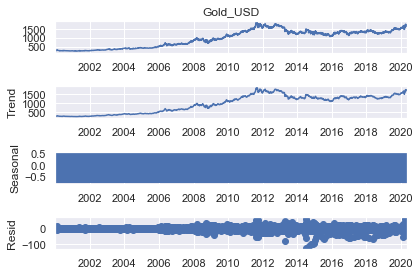

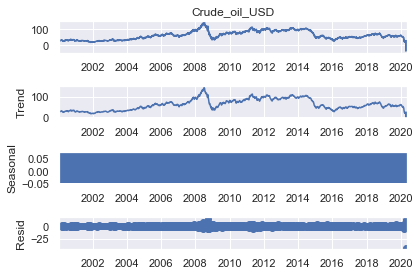

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

for col in us_euro_uk_inr.columns:
    seasonal_decompose(us_euro_uk_inr[col]).plot();

###### Decomposition inference

    -Evidenece for Trend is clearly evident
    -No evidence for seasonality

#####  4.1.3 Agumented Dickey Fuller Test

USD_EU
(-72.12982073373382, 0.0, 0, 5313, {'1%': -3.431581406405848, '5%': -2.8620841555301495, '10%': -2.5670596534355696}, -37015.78670208802)
EU_GBP
(-53.020284144200154, 0.0, 1, 5312, {'1%': -3.43158163833398, '5%': -2.8620842579974095, '10%': -2.567059707982438}, -37997.088693811296)
INR_EU
(-31.874111480462414, 0.0, 4, 5309, {'1%': -3.431582334642859, '5%': -2.862084565630862, '10%': -2.567059871746379}, 5903.722484983333)
EU_STOXX50
(-17.24019560879128, 6.1141486006458775e-30, 18, 5295, {'1%': -3.4315855945219402, '5%': -2.862086005864098, '10%': -2.5670606384325727}, 54911.203640220716)
UK_FTSE100
(-17.754913726864682, 3.3576416431741504e-30, 18, 5295, {'1%': -3.4315855945219402, '5%': -2.862086005864098, '10%': -2.5670606384325727}, 58757.67808571347)
US_SP500
(-14.6106139576513, 4.028455395832612e-27, 31, 5282, {'1%': -3.431588637033321, '5%': -2.8620873500616164, '10%': -2.5670613539958604}, 21733.6157628518)
INR_NIFTY50
(-14.523158841467456, 5.482362836470369e-27, 26, 5287,

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F24A72048>,
      dtype=object)

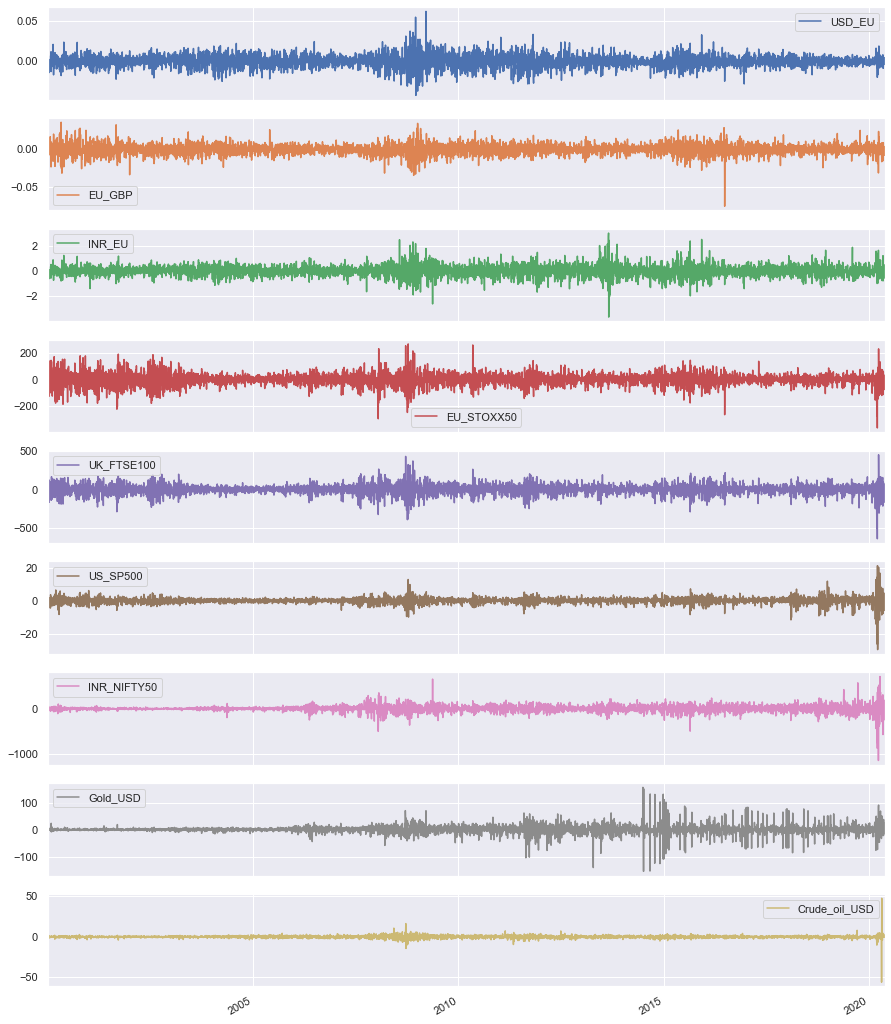

In [20]:
from statsmodels.tsa.stattools import adfuller

diff_d = {}
for col in us_euro_uk_inr.columns:
    print(col)
    print(adfuller(us_euro_uk_inr[col].diff()[1:]))
    diff_d[col] = us_euro_uk_inr[col].diff()[1:]
pd.DataFrame(diff_d).plot(subplots=True,figsize=(15,20))

######  DF test Inference

    -1st order lag differencing makes the data stationary
    -Also, first observation is lost in differencing , need to check how frequency of df is impacted

#### 4.1.4 ACF and PACF plots for INR/EUR 

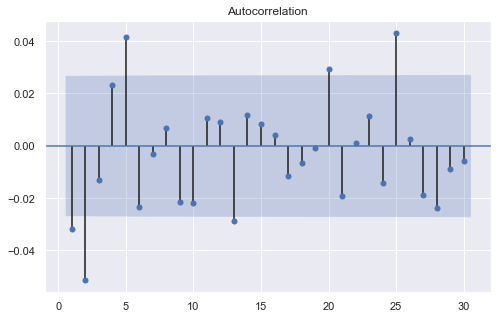

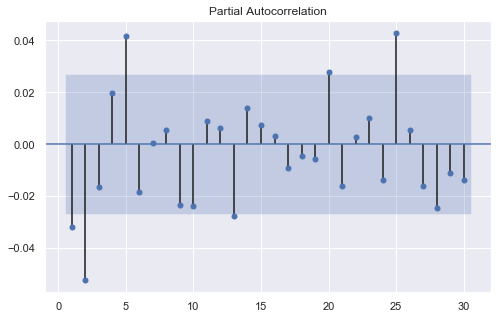

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p = plot_acf(us_euro_uk_inr.INR_EU.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

p = plot_pacf(us_euro_uk_inr.INR_EU.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

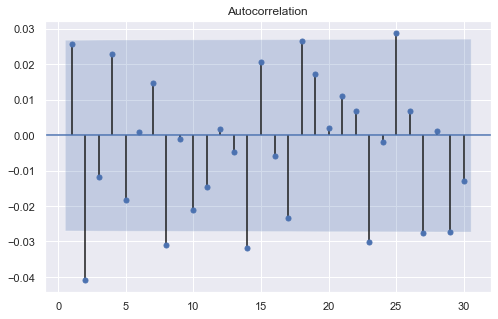

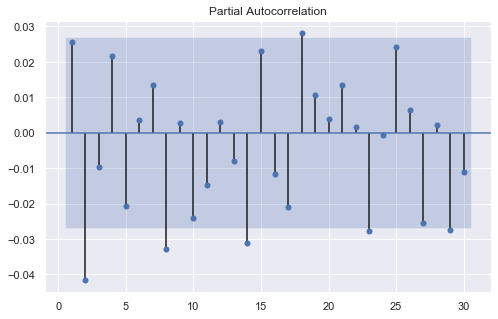

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p = plot_acf(us_euro_uk_inr.EU_GBP.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

p = plot_pacf(us_euro_uk_inr.EU_GBP.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

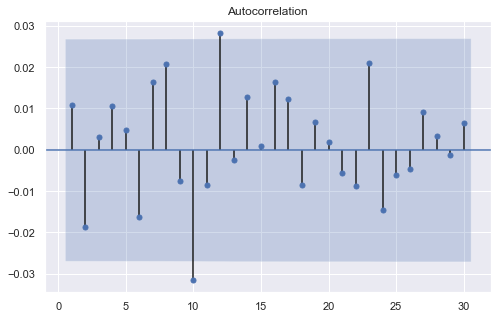

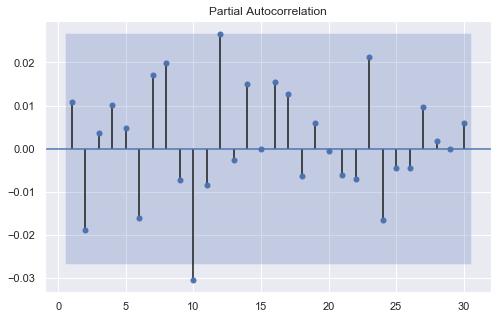

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p = plot_acf(us_euro_uk_inr.USD_EU.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

p = plot_pacf(us_euro_uk_inr.USD_EU.diff()[1:],lags=30,zero=False) 

p.set_size_inches(8, 5)

###### ACF & PACF inference

    -Auto correlation exists for near by lag values

#### TESTS

    -Gargers Causality
    -Post Hoc on Residuals
    
        -LJung
        -Durbin Watson
        -To test for this heteroscedasticity, the Lagrange Multiplier (LM) test proposed by Engle (1982) is applied

### 4.1.4 Granger Causality

Granger causality tests  -  Tests if we can predict a series based on past values of another series

The data for test whether the time series in the second column Granger causes the time series in the first column.

In [24]:
import statsmodels.tsa as sm

#### 1) INR_EU

Crude oil --> INR_EU (Lag 5,6 )

Gold --> INR_EU  (Lag 1 ,3 )

NIFTY50 --> INR_EU (Lag 1 ,5)

EURO STOXX 50 doen't cause INR_EU

In [25]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['INR_EU','Gold_USD']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0564  , p=0.0246  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=5.0592  , p=0.0245  , df=1
likelihood ratio test: chi2=5.0568  , p=0.0245  , df=1
parameter F test:         F=5.0564  , p=0.0246  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8368  , p=0.0587  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=5.6790  , p=0.0585  , df=2
likelihood ratio test: chi2=5.6759  , p=0.0585  , df=2
parameter F test:         F=2.8368  , p=0.0587  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7878  , p=0.0392  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=8.3743  , p=0.0389  , df=3
likelihood ratio test: chi2=8.3678  , p=0.0390  , df=3
parameter F test:         F=2.7878  , p=0.0392  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2495  , p=0.

{1: ({'ssr_ftest': (5.056378811184384, 0.024576280501234213, 5311.0, 1),
   'ssr_chi2test': (5.059234984491399, 0.02449504834243411, 1),
   'lrtest': (5.056828170001609, 0.024529091070297857, 1),
   'params_ftest': (5.056378811185712, 0.024576280501207963, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.8368140998881284, 0.058700967572416024, 5308.0, 2),
   'ssr_chi2test': (5.678972612172428, 0.058455686583560165, 2),
   'lrtest': (5.675939696036949, 0.05854439942873931, 2),
   'params_ftest': (2.8368140998918587, 0.058700967572192723, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.787770638990203, 0.039172900250150966, 5305.0, 3),
   'ssr_chi2test': (8.374347389811097, 0.03887662003773296, 3),
   'lrtest': (8.367753256236028, 0.0389924197413458, 3),
   'params_ftest': (2.787770638993353, 0.0391729002499874, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          

In [26]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['INR_EU','Crude_oil_USD']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6328  , p=0.2014  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=1.6337  , p=0.2012  , df=1
likelihood ratio test: chi2=1.6335  , p=0.2012  , df=1
parameter F test:         F=1.6328  , p=0.2014  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7298  , p=0.1774  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=3.4629  , p=0.1770  , df=2
likelihood ratio test: chi2=3.4617  , p=0.1771  , df=2
parameter F test:         F=1.7298  , p=0.1774  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4909  , p=0.2149  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=4.4787  , p=0.2142  , df=3
likelihood ratio test: chi2=4.4768  , p=0.2144  , df=3
parameter F test:         F=1.4909  , p=0.2149  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9657  , p=0.

{1: ({'ssr_ftest': (1.6328002926305525, 0.20137201395474788, 5311.0, 1),
   'ssr_chi2test': (1.6337226049781126, 0.20118893218712472, 1),
   'lrtest': (1.6334715226821572, 0.20122355980296094, 1),
   'params_ftest': (1.6328002926310277, 0.20137201395463758, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.729798514616878, 0.1774200766715224, 5308.0, 2),
   'ssr_chi2test': (3.462855880994526, 0.1770314390380518, 2),
   'lrtest': (3.4617278777022875, 0.17713131322303893, 2),
   'params_ftest': (1.7297985146161299, 0.1774200766717216, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.4909234353167513, 0.21486394863561312, 5305.0, 3),
   'ssr_chi2test': (4.47867217063294, 0.21420058868670042, 3),
   'lrtest': (4.4767851942579, 0.2143703657413888, 3),
   'params_ftest': (1.4909234353207381, 0.21486394863453703, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

In [27]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['INR_EU','INR_NIFTY50']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2957  , p=0.0383  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=4.2981  , p=0.0382  , df=1
likelihood ratio test: chi2=4.2964  , p=0.0382  , df=1
parameter F test:         F=4.2957  , p=0.0383  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9580  , p=0.1412  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=3.9198  , p=0.1409  , df=2
likelihood ratio test: chi2=3.9183  , p=0.1410  , df=2
parameter F test:         F=1.9580  , p=0.1412  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1407  , p=0.3311  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=3.4265  , p=0.3304  , df=3
likelihood ratio test: chi2=3.4254  , p=0.3306  , df=3
parameter F test:         F=1.1407  , p=0.3311  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8556  , p=0.

{1: ({'ssr_ftest': (4.295662362332401, 0.038257838208968685, 5311.0, 1),
   'ssr_chi2test': (4.298088833258214, 0.03815522760833115, 1),
   'lrtest': (4.296351572020285, 0.03819422646747789, 1),
   'params_ftest': (4.295662362345877, 0.03825783820866127, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.9580430875809374, 0.14123626546090334, 5308.0, 2),
   'ssr_chi2test': (3.9197750280020798, 0.1408742664124155, 2),
   'lrtest': (3.9183297914696595, 0.1409761015200872, 2),
   'params_ftest': (1.9580430875321513, 0.14123626546774978, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.140661907789479, 0.331126286800676, 5305.0, 3),
   'ssr_chi2test': (3.426501067395502, 0.3304205398080182, 3),
   'lrtest': (3.4253964116123825, 0.33056763285761526, 3),
   'params_ftest': (1.140661907851026, 0.331126286776102, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [28]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['INR_EU','EU_STOXX50']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6664  , p=0.4144  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=0.6668  , p=0.4142  , df=1
likelihood ratio test: chi2=0.6667  , p=0.4142  , df=1
parameter F test:         F=0.6664  , p=0.4144  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1601  , p=0.3135  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=2.3224  , p=0.3131  , df=2
likelihood ratio test: chi2=2.3219  , p=0.3132  , df=2
parameter F test:         F=1.1601  , p=0.3135  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0640  , p=0.3631  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=3.1961  , p=0.3624  , df=3
likelihood ratio test: chi2=3.1951  , p=0.3625  , df=3
parameter F test:         F=1.0640  , p=0.3631  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1584  , p=0.

{1: ({'ssr_ftest': (0.6663815076213208, 0.4143526415833305, 5311.0, 1),
   'ssr_chi2test': (0.6667579234606851, 0.41418423115246306, 1),
   'lrtest': (0.6667160972501733, 0.4141988731793811, 1),
   'params_ftest': (0.6663815076211584, 0.4143526415837434, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.16012890218731, 0.31352523881476696, 5308.0, 2),
   'ssr_chi2test': (2.3224434277773844, 0.3131034243186211, 2),
   'lrtest': (2.321935976980967, 0.31318287668875294, 2),
   'params_ftest': (1.1601289021637582, 0.3135252388219778, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.063957453558724, 0.36307296929373467, 5305.0, 3),
   'ssr_chi2test': (3.196084067843888, 0.3623696280824661, 3),
   'lrtest': (3.1951229554706515, 0.3625083177779021, 3),
   'params_ftest': (1.063957453563237, 0.36307296929182703, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

#### 2) EU_GBP

Crude oil --> EU_GBP (Lag 10 )

FTSE100 --> EU_GBP (Lag 4 ,5 )

EURO STOXX 50 --> EU_GBP (Lag 3 ,4 )

GOLD doen't cause EU_GBP , its other way

In [29]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['EU_GBP','Gold_USD']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2184  , p=0.2697  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=1.2191  , p=0.2695  , df=1
likelihood ratio test: chi2=1.2189  , p=0.2696  , df=1
parameter F test:         F=1.2184  , p=0.2697  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7738  , p=0.4613  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=1.5491  , p=0.4609  , df=2
likelihood ratio test: chi2=1.5489  , p=0.4610  , df=2
parameter F test:         F=0.7738  , p=0.4613  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4987  , p=0.6832  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=1.4982  , p=0.6827  , df=3
likelihood ratio test: chi2=1.4979  , p=0.6827  , df=3
parameter F test:         F=0.4987  , p=0.6832  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4515  , p=0.

{1: ({'ssr_ftest': (1.2183762496684922, 0.2697295573740771, 5311.0, 1),
   'ssr_chi2test': (1.2190644682241325, 0.2695443286561685, 1),
   'lrtest': (1.2189246591369738, 0.2695717913588863, 1),
   'params_ftest': (1.218376250711015, 0.26972955716903285, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7738205108399245, 0.46129952309015765, 5308.0, 2),
   'ssr_chi2test': (1.5490988598690727, 0.46091140710327105, 2),
   'lrtest': (1.5488730702127214, 0.4609634445547043, 2),
   'params_ftest': (0.7738205109075773, 0.4612995230588861, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.4987280232014194, 0.6831674829068655, 5305.0, 3),
   'ssr_chi2test': (1.4981582992908236, 0.6826954590998452, 3),
   'lrtest': (1.4979470741018304, 0.6827442255686382, 3),
   'params_ftest': (0.4987280230399265, 0.6831674830188541, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [30]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['EU_GBP','Crude_oil_USD']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0105  , p=0.9182  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=0.0106  , p=0.9182  , df=1
likelihood ratio test: chi2=0.0106  , p=0.9182  , df=1
parameter F test:         F=0.0105  , p=0.9182  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4777  , p=0.0840  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=4.9601  , p=0.0837  , df=2
likelihood ratio test: chi2=4.9578  , p=0.0838  , df=2
parameter F test:         F=2.4777  , p=0.0840  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7468  , p=0.1552  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=5.2473  , p=0.1546  , df=3
likelihood ratio test: chi2=5.2447  , p=0.1547  , df=3
parameter F test:         F=1.7468  , p=0.1552  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3215  , p=0.

{1: ({'ssr_ftest': (0.01054584431402166, 0.9182105371648863, 5311.0, 1),
   'ssr_chi2test': (0.010551801296311636, 0.9181836433908702, 1),
   'lrtest': (0.0105517908159527, 0.9181836838793747, 1),
   'params_ftest': (0.01054584475760773, 0.9182105354514631, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.477724273883043, 0.08403109123060924, 5308.0, 2),
   'ssr_chi2test': (4.960116453331051, 0.08373834964536582, 2),
   'lrtest': (4.957802557844843, 0.08383528660468469, 2),
   'params_ftest': (2.4777242742314143, 0.08403109120137771, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.746782165327288, 0.15515957953843107, 5305.0, 3),
   'ssr_chi2test': (5.247261185043479, 0.15456137316676327, 3),
   'lrtest': (5.2446712348173605, 0.15473315101456891, 3),
   'params_ftest': (1.746782165495944, 0.15515957950473006, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

In [31]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['EU_GBP','UK_FTSE100']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3927  , p=0.5309  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=0.3929  , p=0.5308  , df=1
likelihood ratio test: chi2=0.3929  , p=0.5308  , df=1
parameter F test:         F=0.3927  , p=0.5309  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6411  , p=0.1939  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=3.2853  , p=0.1935  , df=2
likelihood ratio test: chi2=3.2843  , p=0.1936  , df=2
parameter F test:         F=1.6411  , p=0.1939  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4633  , p=0.0606  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=7.3996  , p=0.0602  , df=3
likelihood ratio test: chi2=7.3945  , p=0.0603  , df=3
parameter F test:         F=2.4633  , p=0.0606  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.8212  , p=0.

{1: ({'ssr_ftest': (0.39266453317939465, 0.5309290576187665, 5311.0, 1),
   'ssr_chi2test': (0.3928863357776884, 0.5307861097855828, 1),
   'lrtest': (0.3928718126262538, 0.530793704804778, 1),
   'params_ftest': (0.3926645331768898, 0.5309290576200008, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.6411011129895554, 0.19386486504928596, 5308.0, 2),
   'ssr_chi2test': (3.2852939763803723, 0.1934672583757036, 2),
   'lrtest': (3.284278664010344, 0.19356549815992294, 2),
   'params_ftest': (1.6411011135676716, 0.19386486493725444, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.4632983014713283, 0.0605759861125373, 5305.0, 3),
   'ssr_chi2test': (7.399645943873154, 0.060193824267634005, 3),
   'lrtest': (7.394496850873111, 0.060332154512992196, 3),
   'params_ftest': (2.4632983012413305, 0.06057598613116193, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

In [32]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['EU_GBP','EU_STOXX50']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9295  , p=0.3350  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=0.9300  , p=0.3349  , df=1
likelihood ratio test: chi2=0.9300  , p=0.3349  , df=1
parameter F test:         F=0.9295  , p=0.3350  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4155  , p=0.2429  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=2.8337  , p=0.2425  , df=2
likelihood ratio test: chi2=2.8329  , p=0.2426  , df=2
parameter F test:         F=1.4155  , p=0.2429  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2975  , p=0.0196  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=9.9057  , p=0.0194  , df=3
likelihood ratio test: chi2=9.8965  , p=0.0195  , df=3
parameter F test:         F=3.2975  , p=0.0196  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1054  , p=0.

{1: ({'ssr_ftest': (0.9295246482716938, 0.33503037098584254, 5311.0, 1),
   'ssr_chi2test': (0.930049704559552, 0.33485000971393947, 1),
   'lrtest': (0.9299683259814628, 0.3348711556878615, 1),
   'params_ftest': (0.9295246482726697, 0.335030370985536, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.4155085331812307, 0.24289374679908976, 5308.0, 2),
   'ssr_chi2test': (2.833683811903496, 0.24247857913946133, 2),
   'lrtest': (2.8329284091232694, 0.24257018093384852, 2),
   'params_ftest': (1.4155085329929449, 0.242893746844853, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.297549820792962, 0.019575056730664092, 5305.0, 3),
   'ssr_chi2test': (9.905702911245362, 0.019384938820825547, 3),
   'lrtest': (9.896478406772076, 0.01946691740517887, 3),
   'params_ftest': (3.2975498212014878, 0.01957505671971165, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [33]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['EU_GBP','US_SP500']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0396  , p=0.8423  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=0.0396  , p=0.8422  , df=1
likelihood ratio test: chi2=0.0396  , p=0.8422  , df=1
parameter F test:         F=0.0396  , p=0.8423  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5025  , p=0.0111  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=9.0134  , p=0.0110  , df=2
likelihood ratio test: chi2=9.0058  , p=0.0111  , df=2
parameter F test:         F=4.5025  , p=0.0111  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4155  , p=0.0010  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=16.2678 , p=0.0010  , df=3
likelihood ratio test: chi2=16.2430 , p=0.0010  , df=3
parameter F test:         F=5.4155  , p=0.0010  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.3121  , p=0.

{1: ({'ssr_ftest': (0.03961108781441711, 0.8422505375338711, 5311.0, 1),
   'ssr_chi2test': (0.03963346274634015, 0.8421989549018956, 1),
   'lrtest': (0.03963331494742306, 0.842199245267007, 1),
   'params_ftest': (0.03961108781168862, 0.842250537538506, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.502471906992635, 0.011123925583799035, 5308.0, 2),
   'ssr_chi2test': (9.013426240336047, 0.011034670269254587, 2),
   'lrtest': (9.00578930399206, 0.011076886355562145, 2),
   'params_ftest': (4.502471906980624, 0.011123925583929599, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.41547027186413, 0.0010205825754331331, 5305.0, 3),
   'ssr_chi2test': (16.267848115443314, 0.0009992386851181332, 3),
   'lrtest': (16.242988946316473, 0.0010110440362601056, 3),
   'params_ftest': (5.415470271866584, 0.0010205825754290878, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
   

#### 3) USD_EU

Crude oil --> USD_EU (Lag 2 ,3 )

Gold --> USD_EU (Lag 1 ,3 )

SP500 --> USD_EU (Lag 2 ,3 )

NIFTY50 --> USD_EU (Lag 3,4)

EURO STOXX 50 doen't cause USD_EU

In [34]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['USD_EU','Crude_oil_USD']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0631  , p=0.8016  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=0.0632  , p=0.8016  , df=1
likelihood ratio test: chi2=0.0632  , p=0.8016  , df=1
parameter F test:         F=0.0631  , p=0.8016  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4683  , p=0.0312  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=6.9430  , p=0.0311  , df=2
likelihood ratio test: chi2=6.9385  , p=0.0311  , df=2
parameter F test:         F=3.4683  , p=0.0312  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6480  , p=0.0473  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=7.9544  , p=0.0470  , df=3
likelihood ratio test: chi2=7.9485  , p=0.0471  , df=3
parameter F test:         F=2.6480  , p=0.0473  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1127  , p=0.

{1: ({'ssr_ftest': (0.06313694458830701, 0.8016145785910805, 5311.0, 1),
   'ssr_chi2test': (0.0631726084621095, 0.8015500018427444, 1),
   'lrtest': (0.06317223297082819, 0.8015505793114409, 1),
   'params_ftest': (0.0631369445517745, 0.8016145786473179, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.4682526353996614, 0.031242108961418196, 5308.0, 2),
   'ssr_chi2test': (6.943039281039336, 0.031069779871616732, 2),
   'lrtest': (6.938506640479318, 0.03114027379456617, 2),
   'params_ftest': (3.4682526353950673, 0.031242108961555607, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.6479751650145986, 0.04729505462651037, 5305.0, 3),
   'ssr_chi2test': (7.954407583350169, 0.04696342115430373, 3),
   'lrtest': (7.9484578933916055, 0.04708902285853854, 3),
   'params_ftest': (2.647975165014397, 0.04729505462653179, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
        

In [35]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['USD_EU','Gold_USD']],maxlag =10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6964  , p=0.4040  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=0.6968  , p=0.4039  , df=1
likelihood ratio test: chi2=0.6968  , p=0.4039  , df=1
parameter F test:         F=0.6964  , p=0.4040  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0905  , p=0.0456  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=6.1869  , p=0.0453  , df=2
likelihood ratio test: chi2=6.1833  , p=0.0454  , df=2
parameter F test:         F=3.0905  , p=0.0456  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.6938  , p=0.0028  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=14.1000 , p=0.0028  , df=3
likelihood ratio test: chi2=14.0814 , p=0.0028  , df=3
parameter F test:         F=4.6938  , p=0.0028  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.9598  , p=0.

{1: ({'ssr_ftest': (0.6964126935526509, 0.40402924708641175, 5311.0, 1),
   'ssr_chi2test': (0.6968060729690805, 0.4038589856306388, 1),
   'lrtest': (0.6967603921002592, 0.40387439521834867, 1),
   'params_ftest': (0.696412693768743, 0.40402924701336873, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.0905209337108452, 0.04556010162940721, 5308.0, 2),
   'ssr_chi2test': (6.186864250491983, 0.04534605368659842, 2),
   'lrtest': (6.1832648151612375, 0.04542773726211238, 2),
   'params_ftest': (3.090520933595055, 0.045560101634675575, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.693819708661342, 0.0028191498401146944, 5305.0, 3),
   'ssr_chi2test': (14.100039750655446, 0.002772096093747167, 3),
   'lrtest': (14.081359403608076, 0.002796474544025421, 3),
   'params_ftest': (4.693819708480959, 0.002819149840828078, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
     

In [36]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['USD_EU','US_SP500']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7163  , p=0.1902  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=1.7173  , p=0.1900  , df=1
likelihood ratio test: chi2=1.7170  , p=0.1901  , df=1
parameter F test:         F=1.7163  , p=0.1902  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.4796 , p=0.0000  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=28.9864 , p=0.0000  , df=2
likelihood ratio test: chi2=28.9077 , p=0.0000  , df=2
parameter F test:         F=14.4796 , p=0.0000  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.7486  , p=0.0000  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=29.2843 , p=0.0000  , df=3
likelihood ratio test: chi2=29.2038 , p=0.0000  , df=3
parameter F test:         F=9.7486  , p=0.0000  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.5025  , p=0.

{1: ({'ssr_ftest': (1.7163159871819902, 0.19022460866729463, 5311.0, 1),
   'ssr_chi2test': (1.7172854746535675, 0.19004283927131974, 1),
   'lrtest': (1.7170080533032888, 0.19007863016627968, 1),
   'params_ftest': (1.716315987202088, 0.19022460866459065, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (14.479583576701597, 5.354126400794574e-07, 5308.0, 2),
   'ssr_chi2test': (28.986445946878515, 5.077772481430444e-07, 2),
   'lrtest': (28.907660844728525, 5.28179091468475e-07, 2),
   'params_ftest': (14.479583576691766, 5.354126400848301e-07, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (9.748561493636515, 2.0644701290037425e-06, 5305.0, 3),
   'ssr_chi2test': (29.284274451006876, 1.9516136792260945e-06, 3),
   'lrtest': (29.20384994635242, 2.0290736118066844e-06, 3),
   'params_ftest': (9.748561493641835, 2.0644701289871406e-06, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1.,

In [37]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['USD_EU','EU_STOXX50']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6401  , p=0.4237  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=0.6405  , p=0.4235  , df=1
likelihood ratio test: chi2=0.6404  , p=0.4236  , df=1
parameter F test:         F=0.6401  , p=0.4237  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2617  , p=0.2833  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=2.5257  , p=0.2828  , df=2
likelihood ratio test: chi2=2.5251  , p=0.2829  , df=2
parameter F test:         F=1.2617  , p=0.2833  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8824  , p=0.4493  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=2.6508  , p=0.4487  , df=3
likelihood ratio test: chi2=2.6501  , p=0.4488  , df=3
parameter F test:         F=0.8824  , p=0.4493  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3052  , p=0.

{1: ({'ssr_ftest': (0.6400938615052729, 0.42371259407657114, 5311.0, 1),
   'ssr_chi2test': (0.6404554283635888, 0.4235459280792473, 1),
   'lrtest': (0.6404168368899263, 0.4235598948040664, 1),
   'params_ftest': (0.6400938615021183, 0.42371259407742545, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.2616525743752456, 0.28327056200139045, 5308.0, 2),
   'ssr_chi2test': (2.5256820375492386, 0.282849303742488, 2),
   'lrtest': (2.525081901207159, 0.28293419055101987, 2),
   'params_ftest': (1.2616525741081794, 0.2832705620768589, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.8824238841216738, 0.44933340936803845, 5305.0, 3),
   'ssr_chi2test': (2.6507647535085757, 0.4486592526159745, 3),
   'lrtest': (2.6501035885085003, 0.4487733679392457, 3),
   'params_ftest': (0.8824238844538271, 0.4493334091958464, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.,

In [38]:
sm.stattools.grangercausalitytests(us_euro_uk_inr[['USD_EU','INR_NIFTY50']],maxlag = 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6592  , p=0.4169  , df_denom=5311, df_num=1
ssr based chi2 test:   chi2=0.6596  , p=0.4167  , df=1
likelihood ratio test: chi2=0.6595  , p=0.4167  , df=1
parameter F test:         F=0.6592  , p=0.4169  , df_denom=5311, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9004  , p=0.0075  , df_denom=5308, df_num=2
ssr based chi2 test:   chi2=9.8101  , p=0.0074  , df=2
likelihood ratio test: chi2=9.8010  , p=0.0074  , df=2
parameter F test:         F=4.9004  , p=0.0075  , df_denom=5308, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.7731  , p=0.0102  , df_denom=5305, df_num=3
ssr based chi2 test:   chi2=11.3342 , p=0.0100  , df=3
likelihood ratio test: chi2=11.3221 , p=0.0101  , df=3
parameter F test:         F=3.7731  , p=0.0102  , df_denom=5305, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9026  , p=0.

{1: ({'ssr_ftest': (0.6591794428294597, 0.41688616702693837, 5311.0, 1),
   'ssr_chi2test': (0.6595517904718035, 0.41671822268682124, 1),
   'lrtest': (0.659510863442847, 0.41673267998579633, 1),
   'params_ftest': (0.659179442830952, 0.4168861670263131, 5311.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.900420006061092, 0.00747716603651278, 5308.0, 2),
   'ssr_chi2test': (9.810072152299389, 0.007409175783558467, 2),
   'lrtest': (9.801026489236392, 0.007442762132861066, 2),
   'params_ftest': (4.900420004996931, 0.0074771660444615555, 5308.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.7730805423517664, 0.010170660393816273, 5305.0, 3),
   'ssr_chi2test': (11.334177478401084, 0.010049523260523828, 3),
   'lrtest': (11.322102823243767, 0.010105756132939153, 3),
   'params_ftest': (3.773080540998052, 0.01017066041285914, 5305.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
      

### Feature Importance Test

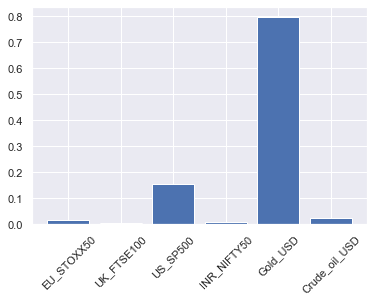

In [39]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

train_cols = ['EU_STOXX50', 'UK_FTSE100', 'US_SP500',
       'INR_NIFTY50', 'Gold_USD', 'Crude_oil_USD']
train_x, train_y = us_euro_uk_inr[train_cols].values , us_euro_uk_inr['INR_EU'].values

model = DecisionTreeRegressor()
# fit the model
model.fit(train_x, train_y)
# get importance
importance = model.feature_importances_


# plot feature importance
pyplot.bar([x for x in train_cols], importance)
pyplot.xticks(rotation=45)
pyplot.show()

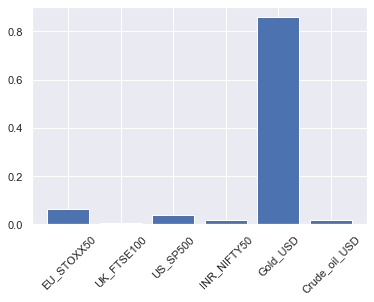

In [40]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

train_cols = ['EU_STOXX50', 'UK_FTSE100', 'US_SP500',
       'INR_NIFTY50', 'Gold_USD', 'Crude_oil_USD']
train_x, train_y = us_euro_uk_inr[train_cols].values , us_euro_uk_inr['EU_GBP'].values

model = DecisionTreeRegressor()
# fit the model
model.fit(train_x, train_y)
# get importance
importance = model.feature_importances_


# plot feature importance
pyplot.bar([x for x in train_cols], importance)
pyplot.xticks(rotation=45)
pyplot.show()

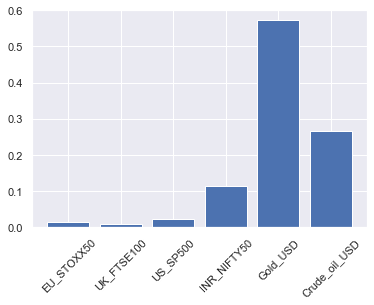

In [41]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

train_cols = ['EU_STOXX50', 'UK_FTSE100', 'US_SP500',
       'INR_NIFTY50', 'Gold_USD', 'Crude_oil_USD']
train_x, train_y = us_euro_uk_inr[train_cols].values , us_euro_uk_inr['USD_EU'].values

model = DecisionTreeRegressor()
# fit the model
model.fit(train_x, train_y)
# get importance
importance = model.feature_importances_


# plot feature importance
pyplot.bar([x for x in train_cols], importance)
pyplot.xticks(rotation=45)
pyplot.show()